In [189]:
#%pip install denoising_diffusion_pytorch
import tqdm as notebook_tqdm

import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

In [190]:
import os
import skimage



In [191]:
import matplotlib.pyplot as plt
import numpy as np
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),
                            interpolation='nearest')

['4.png', '2.png', '3.png', '1.png']
./data/images/4.png
(128, 128, 4)
./data/images/2.png
(128, 128, 4)
./data/images/3.png
(128, 128, 4)
./data/images/1.png
(128, 128, 4)


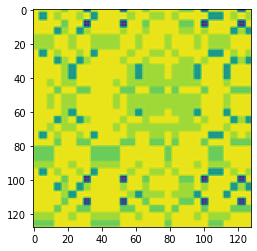

In [215]:
from skimage.color import rgba2rgb
img_data_dir = "./data/images"
train_data = os.listdir(img_data_dir)
print(train_data)
batch = [] 
labels = [] 


for each in train_data:

    f_path = img_data_dir + "/"  
    img = skimage.io.imread(os.path.join(f_path, each)) 
    #img = skimage.io.imread('./data/images/4.png')
    img.shape
    img[0]
    img = img / 255 ## standardize the data
    img = img.astype(float)
    print(os.path.join(f_path, each))
    print(img.shape)
    img= rgba2rgb(img)
    img = img.astype(float)
    plt.imshow(img[:,:,2])
    batch.append(img[:,:,0:3])  
    labels.append(each) 

train_images = torch.tensor(batch)




In [216]:
train_images.shape

torch.Size([4, 128, 128, 3])

In [217]:
train_images = train_images.transpose_(1,3)
train_images.shape

torch.Size([4, 3, 128, 128])

In [179]:
#training_images = torch.rand(4, 3, 128, 128)

In [218]:
train_images.shape
train_images = train_images.float()

In [219]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

#training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(train_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step: 100%|██████████| 1000/1000 [2:35:02<00:00,  9.30s/it]  


torch.Size([4, 3, 128, 128])

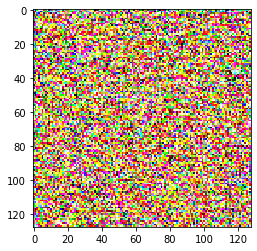

In [223]:
import matplotlib.pyplot as plt
import numpy as np
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),
                            interpolation='nearest')
show(sampled_images[1])

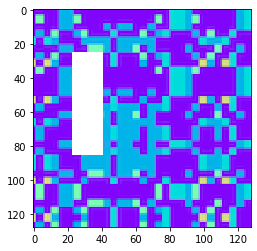

In [228]:
show(train_images[0])